<a href="https://colab.research.google.com/github/wazs555/Data_mining_project/blob/master/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data 불러오기


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/') #자신의 구글드라이브 계정을 colab과 마운트

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/My Drive/데이터마이닝/diabetes.csv')
data.describe().T 
''' 
1. Pregnancies : 임신 횟수
2. Glucose : 포도당 부하 수치
3. Blood Pressure : 혈압(수축기 혈압 - 이완기 혈압)
4. SkinThickness : 팔 삼두근 뒤 쪽의 피하지방 측정값
5. Insuline : 혈청 인슐린
6. BMI
7. Diabetes Pedigree Function : 당뇨 내력 가중치
8. Age : 나이
9. Outcome : 결과 값, Label
'''
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Data Preproceesing

In [ ]:
print(data.isnull().sum()) # data에 NULL값은 존재하지않는다.
print('\n', data.isna().sum())#data에 na값은 존재하지않는다.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#Project proposal에는 boxplot을 이용해서 outlier를 제거하려했지만, 그렇게 될 경우 공복시 인슐린 0으로 측정된 사람들의 경우 거의 다 제거되므로 상위2.5%와 하위 2.5%를 선택적으로 제거
#Read me// 셀을 여러번 실행할 경우 남아있는 데이터에서 지속적으로 상위, 하위 2.5%를 제거하게 됩니다. 그러므로 셀은 한번만 실행해야합니다.
#Blood pressure의 경우 하위 5%까지 제거를 했다. 수축기 혈압과 이완기혈압의 차로 BloodPressure가 정의 되는데, BloodPressure가 0이라는 점은 Outlier라고 판단했다.
#Skinthickness의 경우 0인 데이터가 많아 상위 데이터만 삭제
data.drop(data[(data['Pregnancies'] > data['Pregnancies'].quantile(0.975))].index,inplace=True)
data.drop(data[(data['Glucose'] > data['Glucose'].quantile(0.975)) | (data['Glucose'] < data['Glucose'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['BloodPressure'] > data['BloodPressure'].quantile(0.975)) | (data['BloodPressure'] < data['BloodPressure'].quantile(0.05))].index,inplace=True)
data.drop(data[(data['SkinThickness'] > data['SkinThickness'].quantile(0.975)) |  (data['SkinThickness'] < data['SkinThickness'].quantile(0.05))].index,inplace=True)
data.drop(data[(data['Insulin'] > data['Insulin'].quantile(0.975))].index,inplace=True)
data.drop(data[(data['BMI'] > data['BMI'].quantile(0.975)) | (data['BMI'] < data['BMI'].quantile(0.025))].index,inplace=True)

data.describe() #1574개의 Data가 남는다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1574.000000,1574.000000,1574.000000,1574.00000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,3.610546,119.627700,71.243329,20.64803,74.376747,31.897903,0.462932,32.631512,0.306861
std,3.033849,26.941271,10.869620,14.66006,88.322120,5.714534,0.301011,11.516490,0.461338
min,0.000000,72.000000,38.000000,0.00000,0.000000,20.800000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.00000,0.000000,27.500000,0.247250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.00000,50.000000,31.900000,0.377000,28.000000,0.000000
75%,6.000000,137.000000,79.500000,32.00000,130.000000,35.600000,0.607000,39.000000,1.000000
max,12.000000,189.000000,96.000000,48.00000,402.000000,46.100000,1.893000,81.000000,1.000000


In [ ]:
print(data.values[:,-1]) #label에서 양성인 사람과 음성인 사람의 수 check
cnt_1 = 0
cnt_0 = 0
for i in data.values[:,-1]:
  if i == 1:
    cnt_1 = cnt_1 + 1
  else:
    cnt_0 = cnt_0 + 1
print('당뇨에 양성인 사람의 수', cnt_1, '명', cnt_1/1574*100, '%')
print('당뇨에 음성인 사람의 수', cnt_0, '명', cnt_0/1574*100, '%')

[1. 0. 1. ... 1. 0. 0.]
당뇨에 양성인 사람의 수 483 명 30.6861499364676 %
당뇨에 음성인 사람의 수 1091 명 69.3138500635324 %


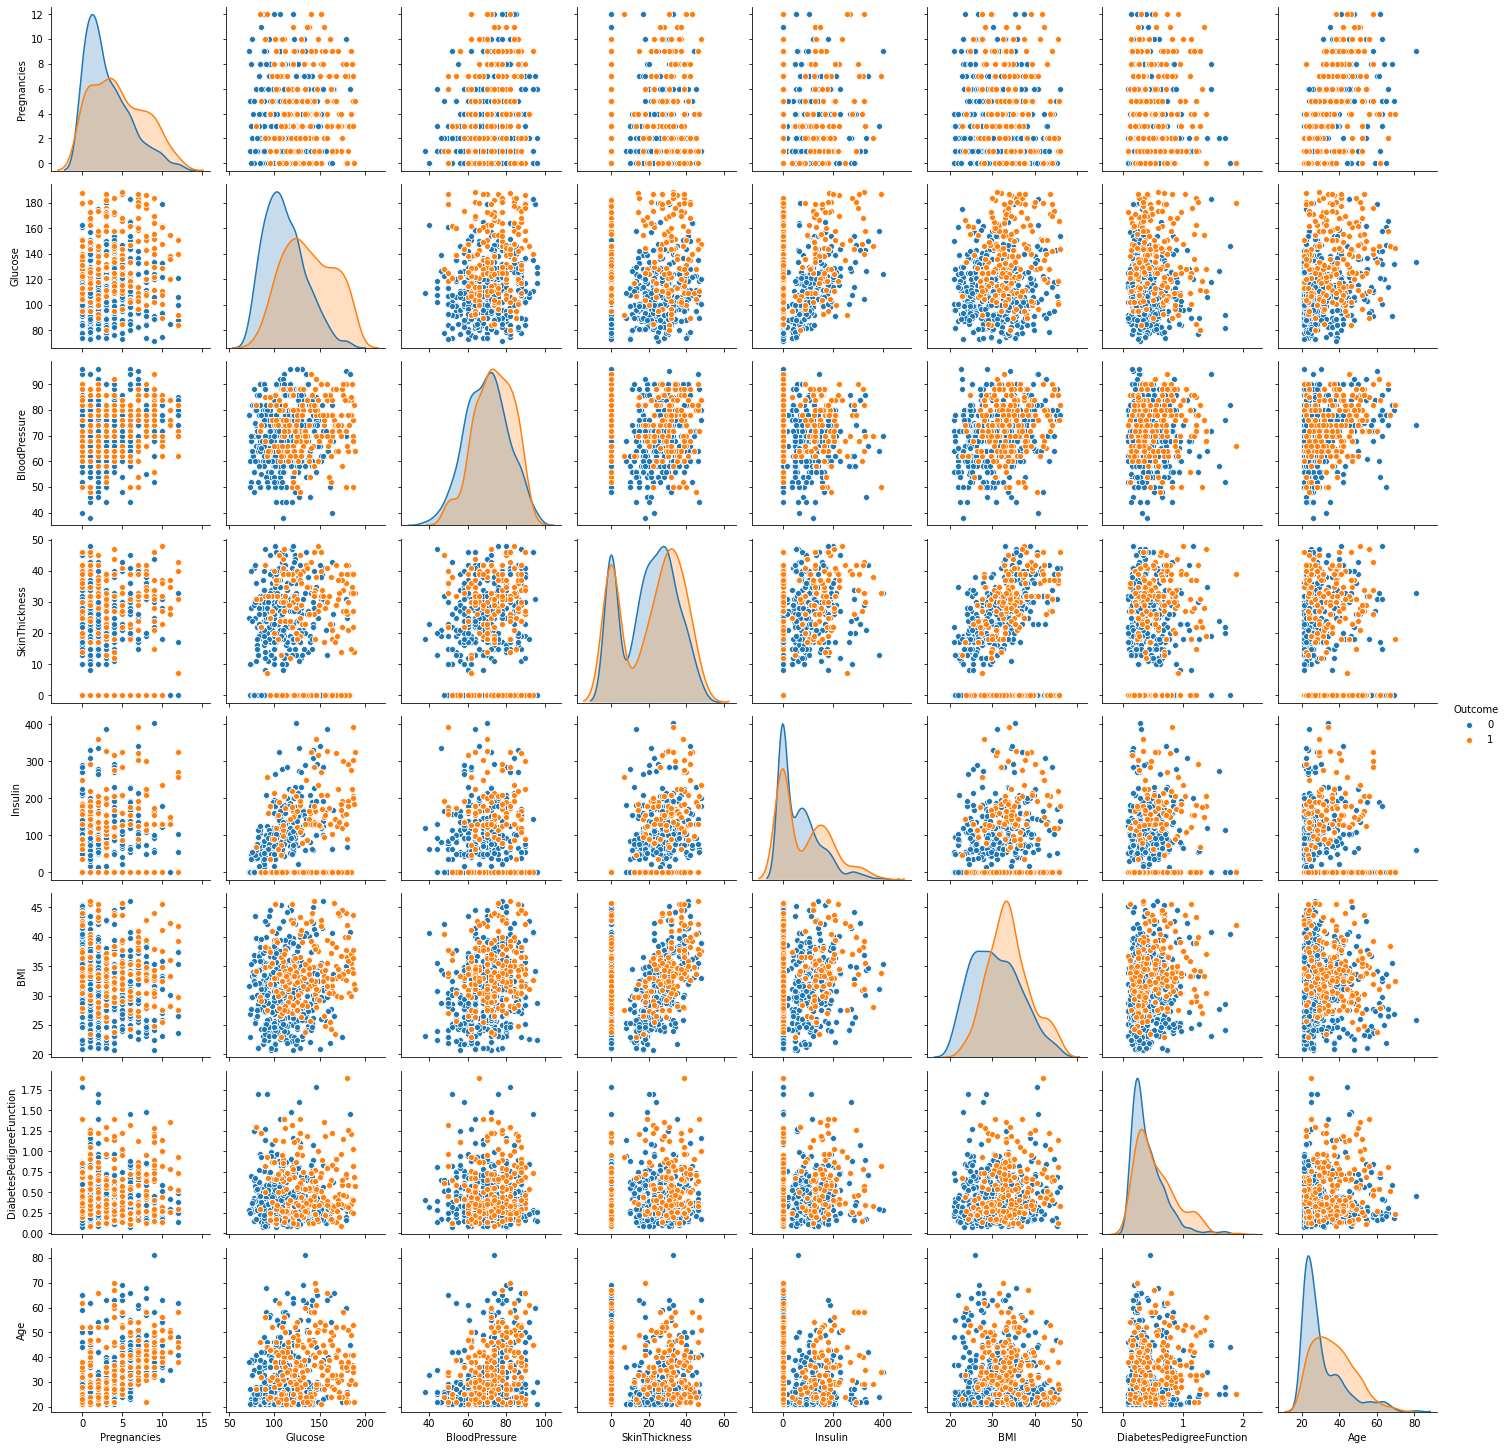

In [ ]:
aa=sns.pairplot(data,hue='Outcome')

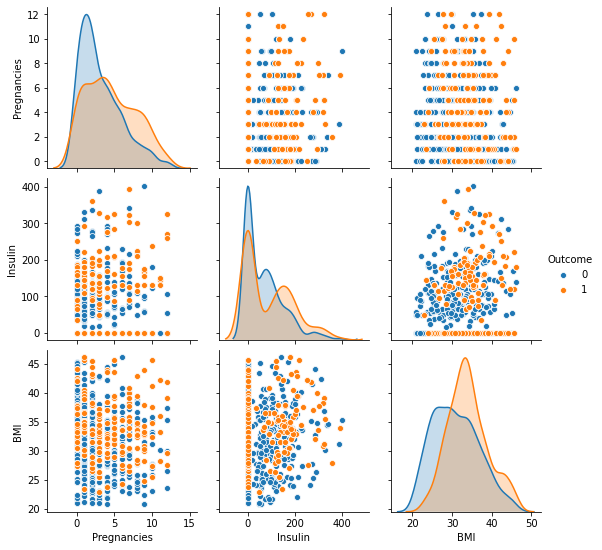

In [ ]:
classes = ['Pregnancies', 'Insulin', 'BMI', 'Outcome']
aa=sns.pairplot(data[classes],hue='Outcome')

In [ ]:
print('BMI : test_statistic:%.2f, p-value:%.2f' %(stats.shapiro(data['BMI'].values)))
print('Insulin : test_statistic:%.2f, p-value:%.2f'%(stats.shapiro(data['Insulin'].values)))
print('SkinThickness : test_statistic:%.2f, p-value:%.2f'%(stats.shapiro(data['SkinThickness'].values)))
print('BloodPressure : test_statistic:%.2f, p-value:%.2f'%(stats.shapiro(data['BloodPressure'].values)))

BMI : test_statistic:0.99, p-value:0.00
Insulin : test_statistic:0.82, p-value:0.00
SkinThickness : test_statistic:0.91, p-value:0.00
BloodPressure : test_statistic:0.99, p-value:0.00


# Correlation Coefficient

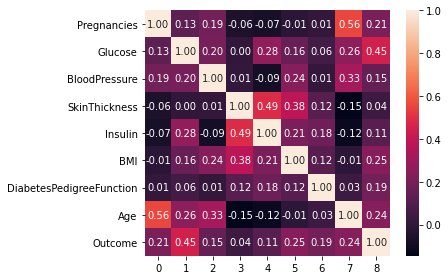

'상관계수가 높은 순으로 봤을 때 feature 기준 1. Age, Pregnancies : 어느정도 이해가 감. \n 위에서 scatterplot을 찍어봤을 때는 SkinThickness와 BMI가 더 관계 있어보였지만 실제로 상관계수는 SkinThickness와 insulin의 상관계수가 더 높았다.'

In [ ]:
#Pearson 상관계수를 구해서 데이터를 시각화. 상관관계를 갖는 것을 대략적으로 분석해보려함
cm = np.corrcoef(data.values.T)
#sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size' : 15}, yticklabels=columns, xticklabels=columns)
sns.heatmap(cm, fmt = '.2f', cbar = True, annot = True, square=True, yticklabels=data.columns)
plt.tight_layout()#자동으로 레이아웃을 맞춰주는 함수.
plt.show()

'''상관계수가 높은 순으로 봤을 때 feature 기준 1. Age, Pregnancies : 어느정도 이해가 감. 
 위에서 scatterplot을 찍어봤을 때는 SkinThickness와 BMI가 더 관계 있어보였지만 실제로 상관계수는 SkinThickness와 insulin의 상관계수가 더 높았다.'''

#Data for Null Hypothesis

In [ ]:
data[data.Outcome == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.0
mean,4.565217,137.900621,73.699793,21.573499,89.515528,34.001863,0.55012,36.844720,1.0
std,3.316842,27.641722,9.958156,15.940901,101.578707,4.981711,0.33272,10.871119,0.0
min,0.000000,80.000000,48.000000,0.000000,0.000000,22.900000,0.08800,21.000000,1.0
25%,2.000000,115.000000,66.000000,0.000000,0.000000,30.500000,0.28600,28.000000,1.0
50%,4.000000,136.000000,74.000000,26.000000,64.000000,33.600000,0.45200,36.000000,1.0
75%,7.000000,161.500000,82.000000,35.000000,166.000000,37.000000,0.73400,44.000000,1.0
max,12.000000,189.000000,94.000000,48.000000,392.000000,46.100000,1.89300,70.000000,1.0


In [ ]:
data[data.Outcome == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.0
mean,3.187901,111.538038,70.155820,20.238313,67.674610,30.966453,0.424333,30.766269,0.0
std,2.799161,22.274006,11.081248,14.044034,80.921094,5.772530,0.277389,11.304517,0.0
min,0.000000,72.000000,38.000000,0.000000,0.000000,20.800000,0.078000,21.000000,0.0
25%,1.000000,95.000000,62.000000,9.000000,0.000000,26.200000,0.233000,23.000000,0.0
50%,2.000000,108.000000,70.000000,22.000000,50.000000,30.400000,0.340000,26.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,107.000000,35.050000,0.551000,36.000000,0.0
max,12.000000,183.000000,96.000000,48.000000,402.000000,46.100000,1.781000,81.000000,0.0


In [ ]:
data[data.BMI > 30].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,3.635021,122.680380,72.832278,24.422996,87.862869,35.609177,0.481755,32.622363,0.399789
std,3.085839,28.900663,10.660764,15.261652,96.048805,3.933493,0.299453,10.568468,0.490113
min,0.000000,72.000000,40.000000,0.000000,0.000000,30.100000,0.085000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,15.000000,0.000000,32.650000,0.261000,24.000000,0.000000
50%,3.000000,119.000000,74.000000,29.000000,70.500000,34.700000,0.400500,29.000000,0.000000
75%,6.000000,143.000000,80.000000,36.000000,156.000000,38.100000,0.632500,39.000000,1.000000
max,12.000000,189.000000,95.000000,48.000000,402.000000,46.100000,1.893000,70.000000,1.000000


In [ ]:
data[data.BMI <= 30].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,3.573482,115.004792,68.837061,14.931310,53.953674,26.277636,0.434427,32.645367,0.166134
std,2.955434,22.927398,10.748126,11.560211,70.435237,2.492981,0.301361,12.828298,0.372499
min,0.000000,73.000000,38.000000,0.000000,0.000000,20.800000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,60.000000,0.000000,0.000000,24.400000,0.223000,22.000000,0.000000
50%,3.000000,111.000000,69.000000,17.000000,0.000000,26.450000,0.336000,28.000000,0.000000
75%,5.000000,130.000000,75.000000,23.000000,100.000000,28.400000,0.563250,39.000000,0.000000
max,12.000000,184.000000,96.000000,39.000000,360.000000,30.000000,1.699000,81.000000,1.000000


In [ ]:
data[data.Pregnancies <= 2].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,1.027586,114.750345,69.444138,22.558621,83.484138,32.108414,0.485646,26.902069,0.208276
std,0.793141,23.864194,11.571003,13.434965,82.374189,6.157619,0.318235,8.341639,0.406355
min,0.000000,73.000000,38.000000,0.000000,0.000000,21.000000,0.078000,21.000000,0.000000
25%,0.000000,97.000000,60.000000,15.000000,0.000000,27.100000,0.254000,22.000000,0.000000
50%,1.000000,111.000000,68.000000,24.000000,71.000000,32.000000,0.415000,24.000000,0.000000
75%,2.000000,128.000000,78.000000,32.000000,142.000000,36.600000,0.646000,28.000000,0.000000
max,2.000000,188.000000,96.000000,48.000000,360.000000,46.100000,1.893000,66.000000,1.000000


In [ ]:
data[data.Pregnancies > 2].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,5.816254,123.792697,72.779741,19.016490,66.599529,31.718139,0.443536,37.524146,0.391048
std,2.441614,28.678470,9.985946,15.452215,92.441082,5.304055,0.284236,11.600959,0.488273
min,3.000000,72.000000,44.000000,0.000000,0.000000,20.800000,0.084000,21.000000,0.000000
25%,4.000000,102.000000,66.000000,0.000000,0.000000,27.900000,0.244000,28.000000,0.000000
50%,5.000000,120.000000,74.000000,22.000000,0.000000,31.900000,0.356000,36.000000,0.000000
75%,7.000000,145.000000,80.000000,32.000000,122.000000,35.000000,0.587000,44.000000,1.000000
max,12.000000,189.000000,96.000000,48.000000,402.000000,46.100000,1.476000,81.000000,1.000000


# Data Split to train, test

In [ ]:
X = data.iloc[:,:8]
Y = data.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split #trainData와 testData 나누기.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y,random_state = 0)

print(X_train.describe().T)
print(X_test.describe().T)

                           count        mean  ...    75%      max
Pregnancies               1101.0    3.599455  ...    6.0   12.000
Glucose                   1101.0  119.778383  ...  137.0  189.000
BloodPressure             1101.0   71.366939  ...   78.0   96.000
SkinThickness             1101.0   20.678474  ...   32.0   48.000
Insulin                   1101.0   75.885559  ...  130.0  402.000
BMI                       1101.0   31.819800  ...   35.5   46.100
DiabetesPedigreeFunction  1101.0    0.461090  ...    0.6    1.893
Age                       1101.0   32.650318  ...   39.0   81.000

[8 rows x 8 columns]
                          count        mean  ...      75%      max
Pregnancies               473.0    3.636364  ...    5.000   12.000
Glucose                   473.0  119.276956  ...  137.000  189.000
BloodPressure             473.0   70.955603  ...   80.000   96.000
SkinThickness             473.0   20.577167  ...   32.000   48.000
Insulin                   473.0   70.864693  ... 

# Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler #표준화를 사용하여 특성의 평균을 0, std를 1로 만들어 정규분포와 같은 특징을 갖도록 만든다.
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train
#전처리에서 표준화를 했기때문에 공분산에서의 뮤는 0이 될 것.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
963,4,125,70,18,122,28.9,1.144,45
724,1,111,94,0,0,32.8,0.265,45
1719,0,102,78,40,90,34.5,0.238,24
67,2,109,92,0,0,42.7,0.845,54
232,1,79,80,25,37,25.4,0.583,22
...,...,...,...,...,...,...,...,...
1071,11,138,74,26,144,36.1,0.557,50
1247,4,129,60,12,231,27.5,0.527,31
971,3,84,72,32,0,37.2,0.267,28
551,3,84,68,30,106,31.9,0.591,25


In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('고유값 \n%s' %eigen_vals)

고유값 
[1.8694755  1.91714099 0.4156136  0.38613208 0.58386252 1.06287906
 0.8599841  0.91218487]


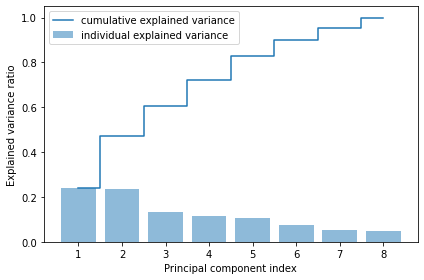

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as pltk
plt.bar(range(1,9), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,9), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
#첫번째와 두번째 주성분이 0.2를 넘기고 나머지들도 조금씩 담당중. #PCA는 비지도학습이므로 label과는 관계없을것이다.

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))] #이 과정은 고유값, 고유벡터를 튜플로 묶음

eigen_pairs.sort(key = lambda k : k[0], reverse = True) #우선 가장 큰 두개의 고유값에 해당하는 고유벡터를 선택, diabetes 분산에 있는 분산의 약40%를 잡아낼 것으로 생각중.

w = np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(w)#8*2의 투영행렬을 만듬(투영행렬 공부)

[[-0.03113587  0.53784256]
 [-0.3366079   0.29824263]
 [-0.14894225  0.40439569]
 [-0.52715705 -0.21142625]
 [-0.5355764  -0.16732194]
 [-0.47863507  0.0009661 ]
 [-0.26268482  0.02551287]
 [-0.02665337  0.62039609]]


In [ ]:
X_train_std[0].dot(w)
#두 개의 특성으로 구성된 2차원 샘플 벡터
X_train_pca = X_train_std.dot(w)

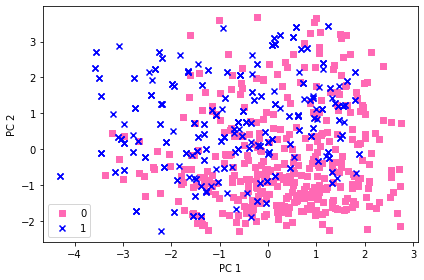

In [ ]:
colors = ['hotpink', 'b']
markers = ['s', 'x']
for l,c,m in zip(np.unique(Y_train), colors, markers):
  plt.scatter(X_train_pca[Y_train == l,0], X_train_pca[Y_train ==l, 1],label = l, c = c, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()
##PCA 특성사이의 상관관계를 기반으로 하여 데이터에 있는 특성을 잡아낸다. 요약// PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분공간으로 이를 투영한다.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth = 5, random_state=0) #max_depth = 17부터 trainset에서는 accuracy 1, testset에서는 accuracy 0.978 // overfitting이 심하게 됨.
tree.fit(X_train, Y_train)

score_train = tree.score(X_train, Y_train)
score_test = tree.score(X_test, Y_test)

print('train_accuracy :','{:.3f}'.format(score_train))
print('test_accuracy :','{:.3f}'.format(score_test))


train_accuracy : 0.838
test_accuracy : 0.772


In [ ]:
import graphviz 
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'tree.dot')
with open('tree.dot') as file_reader:

    dot_graph = file_reader.read()



dot = graphviz.Source(dot_graph) # dot_graph의 source 저장

dot.render(filename='tree.png') # png로 저장

'tree.png.pdf'

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

clf = GaussianNB()
clf.fit(X_train, Y_train).predict_proba(X_test)
prob = clf.fit(X_train, Y_train).predict_proba(X_test)

y_pred = clf.predict(X_test)    
accuracy = accuracy_score(y_pred, Y_test)
confmat = confusion_matrix(y_true = Y_test, y_pred = y_pred)    
print("score using accuracy: ", accuracy)


score using accuracy:  0.7315010570824524


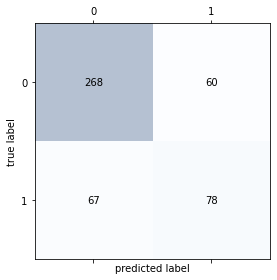

In [ ]:
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x = j, y = i, s = confmat[i][j], va = 'center', ha = 'center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('정밀도(precision) : %.3f' %precision_score(y_true = Y_test, y_pred = y_pred))
print('재현율(recall) : %.3f' %recall_score(y_true = Y_test, y_pred = y_pred))
print('f1_score : %.3f' %f1_score(y_true = Y_test, y_pred = y_pred))

정밀도(precision) : 0.565
재현율(recall) : 0.538
f1_score : 0.551


In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, prob[:,1])
roc_auc = auc(fpr, tpr)

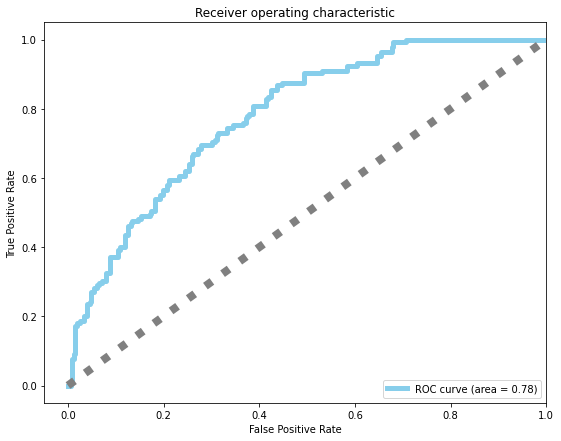

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(fpr, tpr, 
         lw=5, color = 'skyblue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=8,linestyle=':')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', probability=True)
prob = clf.fit(X_train, Y_train).predict_proba(X_test)
y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true = Y_test, y_pred = y_pred)
print(confmat)

[[288  40]
 [ 77  68]]


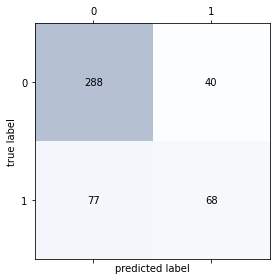

In [ ]:
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x = j, y = i, s = confmat[i][j], va = 'center', ha = 'center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('정밀도(precision) : %.3f' %precision_score(y_true = Y_test, y_pred = y_pred))
print('재현율(recall) : %.3f' %recall_score(y_true = Y_test, y_pred = y_pred))
print('f1_score : %.3f' %f1_score(y_true = Y_test, y_pred = y_pred))

정밀도(precision) : 0.630
재현율(recall) : 0.469
f1_score : 0.538


In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, prob[:,1])
roc_auc = auc(fpr, tpr)

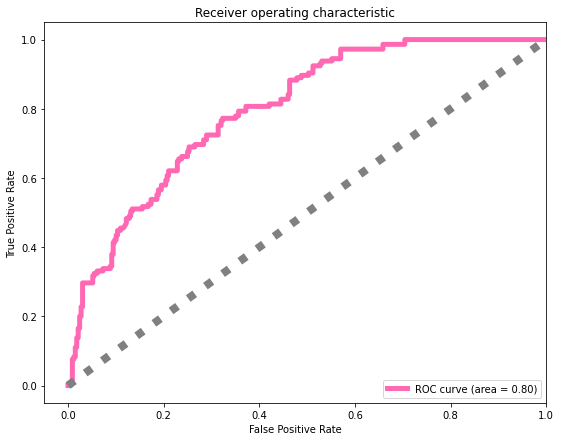

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(fpr, tpr, 
         lw=5, color = 'hotpink', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=8,linestyle=':')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()